In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
iris_df=pd.read_csv('iris.csv')

In [45]:
def correlation_coefficient(x,y):
    numerator=(np.sum((x-x.mean())*(y-y.mean())))
    denominator=np.sqrt(np.sum((x-x.mean())**2)*np.sum((y-y.mean())**2))
    coeff=numerator/denominator
    return coeff

def make_correlation_matrix(df):
    correlation_matrix=[]
    for i in df:
        temp=[]
        for j in df:
            coeff=correlation_coefficient(df[i],df[j])
            temp.append(coeff)
        correlation_matrix.append(temp)
    return pd.DataFrame(correlation_matrix,columns=df.columns,index=df.columns)

def generate_heatmap(correlation_matrix):
    plt.imshow(correlation_matrix,cmap='winter',extent=[0,4,0,4])
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            plt.annotate(str(round(correlation_matrix.iloc[i,j],2)),xy=(i+0.5,len(correlation_matrix)-j-0.5),color='tan',ha='center',va='center')
    plt.colorbar()
    plt.title("Heatmap of the correlation matrix")
    plt.xticks(range(len(correlation_matrix.columns)),correlation_matrix.columns,rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)),correlation_matrix.columns[::-1])
    plt.show()

##### Working of the Correlation Matrix:
* The correlation matrix is constructed by comparing every column/feature with every other feature.
* So for a given column-pair the `correlation_coefficient()` is calculated using the formula:
$$
    \frac{\Sigma{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\Sigma{(x_i-\bar{x})^2}\Sigma{(y_i-\bar{y})^2}}}
$$

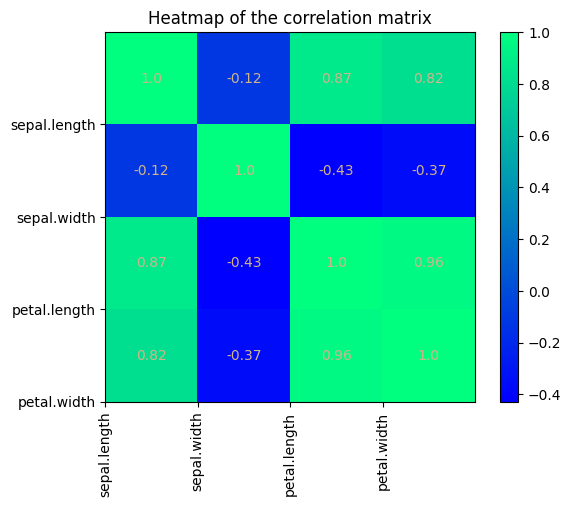

In [46]:
correlation_matrix=make_correlation_matrix(iris_df[['sepal.length','sepal.width','petal.length','petal.width']])
generate_heatmap(correlation_matrix)

##### Inferences:
* The correlation between __petal.length__ and __petal.width__ is the best one for predicting
* While correlation between __sepal.width__ and __petal.length__ is the worst one
* In __Q2__ the accuracy of the model with __sepal.length__ and __sepal.width__ was only 0.77 for 3 neighbours. Thus their correlation of -0.12 makes sense